In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


/usr/local/lib/python3.7/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Download and Extract

In [19]:
# make sure to download kaggle.json from kaggle and place it under /root/.kaggle, or use `%env KAGGLE_CONFIG_DIR=/path/to/new/location`
!kaggle competitions download -c understanding_cloud_organization

100%|█████████████████████████████████████▉| 5.79G/5.80G [01:06<00:00, 82.6MB/s]
100%|██████████████████████████████████████| 5.80G/5.80G [01:06<00:00, 94.2MB/s]


In [ ]:
file_extract('understanding_cloud_organization.zip', dest='understanding_cloud_organization')

## Investigating CAMVID Segmentation Images

In [52]:
path_x = untar_data(URLs.CAMVID_TINY, dest='understanding_cloud_organization/CAMVID/')

In [54]:
files_x = []
for i in get_image_files(path_x/'labels'):
    t_img = tensor(Image.open(i))
    files_x.append(t_img)
print("Unique Labels within Images")    
files_x[0].shape

Unique Labels within Images


torch.Size([96, 128])

In [220]:
t = tensor(Image.open(get_image_files(path_x/'labels')[0])).reshape([96*128])
t[0:3]=2
t

tensor([ 4,  4,  4,  ..., 17, 17, 17], dtype=torch.uint8)

## Trials

In [14]:
t1 = torch.zeros([21*14])
encoded_pixels_s = "16 1 30 1 44 1 58 1 72 1"
encoded_pixels_a = encoded_pixels_s.split()
pairs_a = [[int(encoded_pixels_a[i]), int(encoded_pixels_a[i + 1])] for i in range(0, len(encoded_pixels_a) - 1, 2)]


for pair in pairs_a:
    start_px = pair[0]-1
    length = pair[1]
    t1[start_px:(start_px+length)] = 255

t2 = t1.reshape([21, 14]).T    
pd.DataFrame(t2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cloud Label Images Preparation

### Initialize Variables

- The following folder should include the Kaggle's competition data (test_images, train_images, codes.txt, sample_submission.csv, train.csv)
- the train_images_labels will be created under that folder location (CLOUD_PATH)

In [205]:
# THIS MIGHT NEED TO BE CHANGED ACCORDING TO THE LOCAL SETUP AND THE LOCATION OF THE DATA
CLOUD_PATH = 'cv_2_fast_ai/data/external/understanding_cloud_organization/'
cloud_path = Path(CLOUD_PATH)

In [206]:
train_images_path = cloud_path/'train_images'
label_images_path = cloud_path/'train_images_labels'

In [207]:
codes = list(pd.read_csv(cloud_path/'codes.txt', header=None)[0])
codes

['Fish', 'Flower', 'Gravel', 'Sugar']

In [204]:
train_df = pd.read_csv(cloud_path/'train.csv')

### Clean Label Image folder (train_images_label) by renaming

In [208]:
# Clean the label images folder
os.rename(label_images_path, f'{label_images_path}_old_{time.time()}')
label_images_path.mkdir(parents=True, exist_ok=True)

In [147]:
# INITIAL ATTEMPT - WITH SINGLE CLASS PIXELS
# from os import path
# from torchvision import transforms

# # Void class
# void_class = 4 #codes.index('Void')


# # Removes previoulsy generated files
# previous_images = get_image_files(label_images_folder)
# [os.unlink(f) for f in previous_images]

# for idx, row in train_df.iterrows():
#     train_img_fn = row.Image_Label[:row.Image_Label.index('_')]
#     train_img_path = train_images_path/train_img_fn
    
    
#     if path.exists(train_img_path):
#         train_img_size = Image.open(train_img_path).size
#         label_str = row.Image_Label[row.Image_Label.index('_')+1:]
#         label_idx = codes.index(label_str)
#         label_img_fn = train_img_fn.rsplit(".", 1)[0] + ".png"
#         label_img_path = label_images_path/label_img_fn
#         if path.exists(label_img_path):
#             # Opening Existing Image (label image created for a previous train.csv data record)
#             label_img = Image.open(label_img_path)
#             tensor_label_img = tensor(label_img)
#             label_tensor_flat = tensor(label_img).T.reshape([1400 * 2100])
#         else:
#             # Creating a new label image
#             label_tensor_flat = torch.tensor([void_class]*1400*2100, dtype=torch.uint8)
            
#         if not "nan" in str(row.EncodedPixels):
#             encoded_pixels_a = row.EncodedPixels.split()
#             encoded_pixels_pair_a = [[int(encoded_pixels_a[i]), int(encoded_pixels_a[i + 1])] for i in range(0, len(encoded_pixels_a) - 1, 2)]
            
#             for pair in encoded_pixels_pair_a:
#                 start_px = pair[0]-1
#                 length = pair[1]
#                 label_tensor_flat[start_px:(start_px+length)] = label_idx
        
#         label_img = PILImage.create(label_tensor_flat.reshape([2100, 1400]).T, mode='L', size=train_img_size)
#         label_img.save(label_img_path)
        
#     #break    


### Create Label Images

In [ ]:
from os import path
from torchvision import transforms

train_image_paths = get_image_files(train_images_path)

for train_img_path in train_image_paths:
    
    # get the train_image filename
    train_image_fn = os.path.basename(train_img_path)
    
    # prepare label image path
    label_img_fn = train_img_path.stem + ".png"
    label_img_path = label_images_path/label_img_fn
    

    #placeholder array for the different class tensors
    tensor_a = []

    # for all codes
    for code in codes:
        row = train_df[train_df.Image_Label == f'{train_image_fn}_{code}'].iloc[0]

        # initialize the mask image tensor
        mask_img_t = torch.zeros(1400*2100, dtype=torch.uint8)

        if not "nan" in str(row.EncodedPixels):
            encoded_pixels_a = row.EncodedPixels.split()
            encoded_pixels_pair_a = [[int(encoded_pixels_a[i]), int(encoded_pixels_a[i + 1])] for i in range(0, len(encoded_pixels_a) - 1, 2)]

            for pair in encoded_pixels_pair_a:
                start_px = pair[0]-1
                length = pair[1]
                mask_img_t[start_px:(start_px+length)] = 1

        # transposed mask image tensor        
        mask_img_t_t = mask_img_t.reshape([2100, 1400]).T
        tensor_a.append(mask_img_t_t)

    mask_img_t_full = torch.stack(tensor_a)
    
    mask_img_t_full = mask_img_t_full.permute(1, 2, 0)
    
    label_img = PILImage.create(mask_img_t_full, mode='RGB')
    label_img.save(label_img_path)
    
    tx = tensor(Image.open(label_img_path))
    
#     print(torch.unique(tx[:,:,3]))
#     show_image(PILMask.create(tx[:,:,0]))
#     show_image(PILMask.create(tx[:,:,1]))
#     show_image(PILMask.create(tx[:,:,2]))
#     show_image(PILMask.create(tx[:,:,3]))
    
#     break

## Show Random Image with Masks

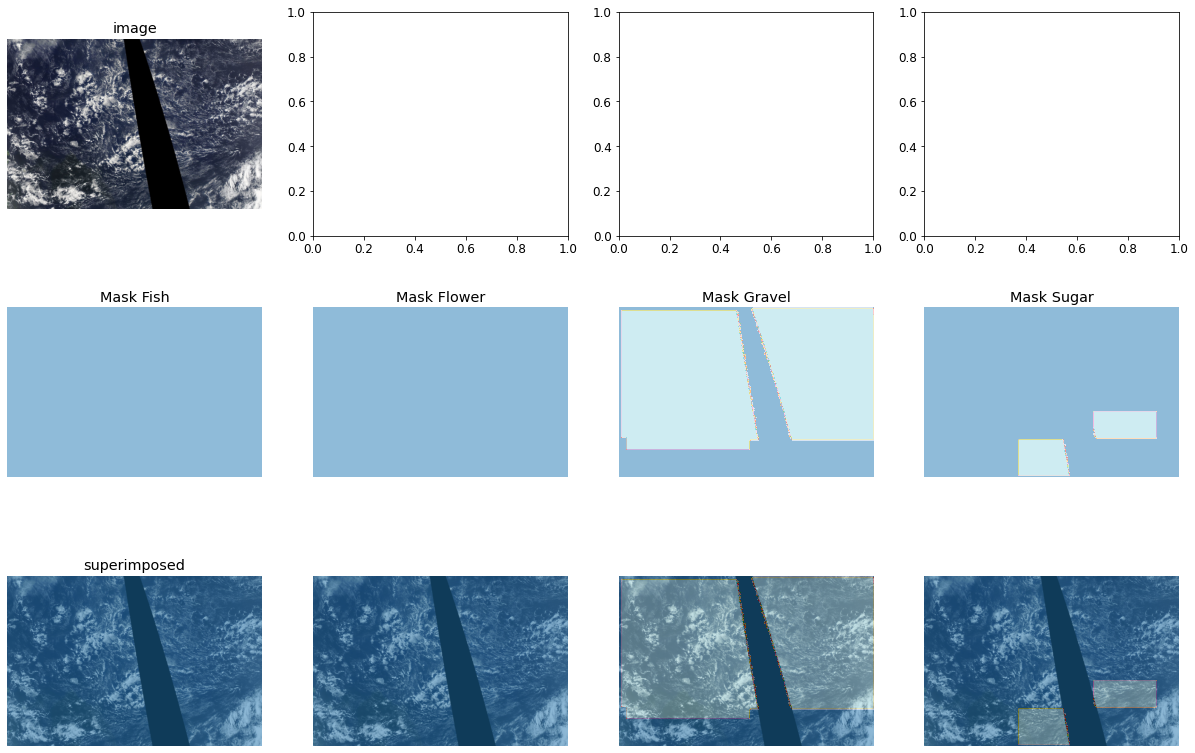

In [213]:
# img_fns = get_image_files(cloud_path/'train_images')

label_fns = get_image_files(cloud_path/'train_images_labels')

label_fn = random.sample(label_fns, 1)[0]
#label_fn = cloud_path/'train_images_labels'/'006c5a6.png'

img_fn = cloud_path/'train_images'/f'{label_fn.stem}.jpg'

label_t = tensor(Image.open(label_fn))

cloud_img = PILImage.create(img_fn)

mask = PILMask.create(label_t[:,:, 0])
mask1 = PILMask.create(label_t[:,:, 1])
mask2 = PILMask.create(label_t[:,:, 2])
mask3 = PILMask.create(label_t[:,:, 3])


_,axs = plt.subplots(3,4, figsize=(21,14))

cloud_img.show(ctx=axs[0][0], title='image')
mask.show(ax=axs[1][0], title=f'Mask {codes[0]}')
mask1.show(ax=axs[1][1], title=f'Mask {codes[1]}')
mask2.show(ax=axs[1][2], title=f'Mask {codes[2]}')
mask3.show(ax=axs[1][3], title=f'Mask {codes[3]}')

cloud_img.show(ax=axs[2][0], title='superimposed')
mask.show(ctx=axs[2][0]);

cloud_img.show(ax=axs[2][1])
mask1.show(ctx=axs[2][1]);

cloud_img.show(ax=axs[2][2])
mask2.show(ctx=axs[2][2]);

cloud_img.show(ax=axs[2][3])
mask3.show(ctx=axs[2][3]);

In [141]:
# Untested Yet - copy form lesson 1

#path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"train_image"),
    label_func = lambda o: path/'train_images_labels'/f'{o.stem}.png',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet18)
learn.fine_tune(20)

TypeError: unsupported operand type(s) for /: 'module' and 'str'